<a href="https://colab.research.google.com/github/lidyaanggreni/StudyCase_MixITup_GroupD/blob/main/StudyCase_MixITup_GroupD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group D**

(2006463894)	Yovela Natalia Yvone

(2006463931)	Najwa Mufidah

(2006521742)	Nadhila Nur Qamarina

(2006522700)	Annisa Fairuz Zahira

(2006572895)	Natania Agustin

(2006571015)	Azizah Annurohmah

(2006528982)	Yemima Kathleen Monica

(2006572983)	Ni Made Lidya Anggreni

## Preprocessing

In [ ]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/nataniaa/CobaAja/main/casestudy.csv
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Installing the required modules
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 5.5 MB/s 
     |████████████████████████████████| 1.1 MB 53.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=85abad1ba48adb7bd8df7e851e5f0d170e6f72842db4a9cc7aed3cbdd784b36d
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=8bdf75c5c6750630147c384194c2f8e4b2a6fc8d209adb8844358da0aab98af1
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
--2022-10-07 06:39:01--  https://raw.githubusercontent.com/nataniaa/CobaAja/main/casestudy.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 18

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 
from sklearn.preprocessing import StandardScaler
sns.set(style="ticks", color_codes=True)
random_state = 99


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nataniaa/CobaAja/main/CaseStudy2fix.csv', sep=';')
df.head()

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8


Berdasarkan data yang kami miliki untuk dianalisis, Data Understandingnya tidak memiliki penjelas di variabel kategorik 'rasa' nomor 2 dan nomor 9 sehingga kami mengasumsikan bahwa:
0. Vanilla
1. Strawberry
2. Cookies n' Cream
3. Cokelat
4. BlueBerry
5. BubbleGum/Cotton Candy
6. Coconut
7. Caramel Pecan
8. Mix Flavors
9. Mint-Choco

In [ ]:
#mengoreksi tipe data yg salah(kalau ada)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Jenis Kelamin         200 non-null    object
 1   Umur                  200 non-null    int64 
 2   Pendapatan-per-bulan  200 non-null    int64 
 3   skor-pengeluaran      200 non-null    int64 
 4   Menikah               200 non-null    int64 
 5   Kota                  200 non-null    object
 6   Promo                 200 non-null    int64 
 7   HariFav               200 non-null    object
 8   FavFlavor             200 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 14.2+ KB


In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')
df.dtypes

Jenis Kelamin           category
Umur                       int64
Pendapatan-per-bulan       int64
skor-pengeluaran           int64
Menikah                 category
Kota                    category
Promo                   category
HariFav                 category
FavFlavor               category
dtype: object

In [ ]:
#stat deskriptif
df.describe(include='all')

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
count,200,200.000000,2.000000e+02,200.00000,200.0,200,200.0,200,200.0
unique,2,NaN,NaN,NaN,2.0,3,5.0,7,10.0
top,Wanita,NaN,NaN,NaN,1.0,Jakarta,1.0,Senin,0.0
freq,114,NaN,NaN,NaN,174.0,88,92.0,66,40.0
mean,NaN,37.355000,1.867213e+07,50.47000,NaN,NaN,NaN,NaN,NaN
std,NaN,11.992417,1.076423e+07,26.07101,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,0.000000e+00,1.00000,NaN,NaN,NaN,NaN,NaN
25%,NaN,28.750000,1.086066e+07,34.75000,NaN,NaN,NaN,NaN,NaN
50%,NaN,36.000000,1.905738e+07,50.00000,NaN,NaN,NaN,NaN,NaN
75%,NaN,48.000000,2.581967e+07,73.00000,NaN,NaN,NaN,NaN,NaN


Terlihat dari statistika deskriptif di atas, dari 200 data customer terlihat bahwa:
*   Customer yang paling sering membeli MixITup adalah customer wanita. 
*   Customer yang membeli MixITup berada di range usia 2-60 tahun dengan rata-rata 37 tahun.
*   Customer di Jakarta paling sering membeli MixITup dengan jumlah 88 customer.
*   Customer paling sering membeli MixITup di hari Senin (66 customer) dibandingkan hari lainnya.
*   Rasa yang paling sering dibeli di MixITup adalah rasa vanilla (40 rasa vanilla ice cream terjual).

In [ ]:
#check missing value
print(df.isnull().sum())

Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64


Terlihat dari *output* di atas, tidak terdapat missing value pada data yang akan kami analisis.

In [ ]:
#check duplikat
print(df.shape)
df.duplicated().sum()

(200, 9)


0

Terlihat dari *output* di atas, tidak terdapat duplikat pada data yang akan kami analisis.

## EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Customer yang cenderung paling sering membeli MixItup Ice Cream**

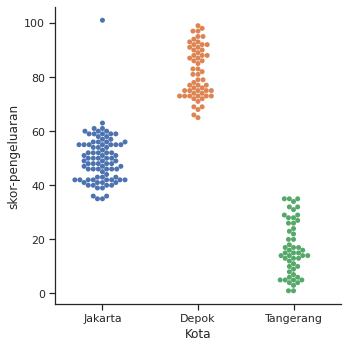

In [ ]:
p = sns.catplot(x='Kota',y='skor-pengeluaran',kind='swarm',data=df)

Berdasarkan *output* di atas, terlihat bahwa customer MixITup yang berasal dari kota Depok paling sering membeli MixITup dengan skor-pengeluaran >= 60, disusul oleh customer dari Kota Jakarta, lalu Kota Tangerang. Oleh karena itu untuk mempertahankan tingkat penjualan, kami menyarankan kepada perusahaan MixITup Ice Cream untuk tetap memberikan diskon 5% kepada customer yang memiliki skor-pengeluaran >= 60. Kemudian, untuk customer yang memiliki skor-pengeluaran < 60, kami menyarankan kepada perusahaan MixITup Ice Cream untuk melakukan promosi, misalkan buy 1 get 1 atau memberikan potongan harga pada hari-hari besar. Hal itu bertujuan untuk meningkatkan tingkat penjualan perusahaan MixITup Ice Cream.

**Proporsi pelanggan pria dan wanita yang membeli MixITup Ice Cream**

<function matplotlib.pyplot.show(*args, **kw)>

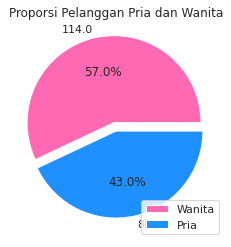

In [ ]:
from collections import Counter

data = df['Jenis Kelamin']
proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['hotpink','dodgerblue']
labels = proporsion.keys()
explode = (0.1,0)
plt.pie(values, colors=colors,labels=values,autopct='%1.1f%%',explode=explode)
plt.title('Proporsi Pelanggan Pria dan Wanita')
plt.legend(labels,loc='lower right')
plt.show

Berdasarkan pie chart di atas terlihat bahwa customer pria dan wanita MixITup Ice Cream cenderung tidak proposional, dimana customer wanita lebih banyak dibandingkan dengan customer pria. 

**Pemesanan Rasa Ice Cream berdasarkan Hari**

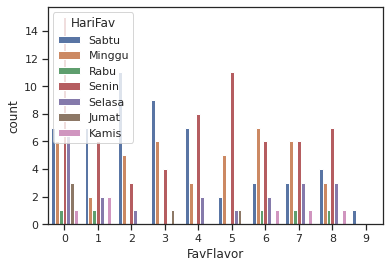

In [ ]:
p = sns.countplot(x='FavFlavor',hue='HariFav',data=df)

Berdasarkan bar chart di atas terlihat bahwa pada hari Senin, customer MixITup Ice Cream paling banyak memesan ice cream rasa vanilla dan BubbleGum/CottonCandy maka perusahaan disarankan untuk menyediakan stok ice cream rasa vanila dan BubbleGum/CottonCandylebih banyak di hari Senin. Kemudian, menyetok lebih banyak rasa cokelat di hari Sabtu.

## Clustering

In [ ]:
# Get one hot encoding of columns jenis kelamin
one_hotJK = pd.get_dummies(df['Jenis Kelamin'])
# Drop column harifav as it is now encoded
df = df.drop('Jenis Kelamin',axis = 1)
# Join the encoded df
df = df.join(one_hotJK)
df  

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,Pria,Wanita
0,49,13114754,52,1,Jakarta,1,Sabtu,2,0,1
1,32,33606557,86,1,Depok,1,Minggu,6,0,1
2,51,15983606,41,1,Jakarta,2,Minggu,3,1,0
3,19,12704918,55,0,Jakarta,1,Rabu,7,1,0
4,38,20081967,42,1,Jakarta,2,Senin,8,0,1
...,...,...,...,...,...,...,...,...,...,...
195,31,4098360,73,1,Depok,1,Senin,0,1,0
196,57,15983606,51,1,Jakarta,1,Minggu,5,1,0
197,35,43032786,79,1,Depok,1,Senin,7,0,1
198,23,1229508,94,1,Depok,0,Selasa,0,0,1


In [ ]:
# Get one hot encoding of columns harifav
one_hotharifav = pd.get_dummies(df['HariFav'])
# Drop column harifav as it is now encoded
df = df.drop('HariFav',axis = 1)
# Join the encoded df
df = df.join(one_hotharifav)
df

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,FavFlavor,Pria,Wanita,0,1,Jumat,Kamis,Minggu,Rabu,Sabtu,Selasa,Senin
0,49,13114754,52,Jakarta,1,2,0,1,0,1,0,0,0,0,1,0,0
1,32,33606557,86,Depok,1,6,0,1,0,1,0,0,1,0,0,0,0
2,51,15983606,41,Jakarta,2,3,1,0,0,1,0,0,1,0,0,0,0
3,19,12704918,55,Jakarta,1,7,1,0,1,0,0,0,0,1,0,0,0
4,38,20081967,42,Jakarta,2,8,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,31,4098360,73,Depok,1,0,1,0,0,1,0,0,0,0,0,0,1
196,57,15983606,51,Jakarta,1,5,1,0,0,1,0,0,1,0,0,0,0
197,35,43032786,79,Depok,1,7,0,1,0,1,0,0,0,0,0,0,1
198,23,1229508,94,Depok,0,0,0,1,0,1,0,0,0,0,0,1,0


In [ ]:
#standardizing variables
df[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']] = StandardScaler().fit_transform(df[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']])
df

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,Pria,Wanita,0,1,Jumat,Kamis,Minggu,Rabu,Sabtu,Selasa,Senin
0,0.973467,-0.517577,0.058833,Jakarta,1,0,1,0,1,0,0,0,0,1,0,0
1,-0.447653,1.390894,1.366236,Depok,1,0,1,0,1,0,0,1,0,0,0,0
2,1.140658,-0.250391,-0.364150,Jakarta,2,1,0,0,1,0,0,1,0,0,0,0
3,-1.534391,-0.555747,0.174192,Jakarta,1,1,0,1,0,0,0,0,1,0,0,0
4,0.053919,0.131303,-0.325697,Jakarta,2,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.531248,-1.357305,0.866347,Depok,1,1,0,0,1,0,0,0,0,0,0,1
196,1.642229,-0.250391,0.020380,Jakarta,1,1,0,0,1,0,0,1,0,0,0,0
197,-0.196867,2.268791,1.097065,Depok,1,0,1,0,1,0,0,0,0,0,0,1
198,-1.200010,-1.624491,1.673861,Depok,0,0,1,0,1,0,0,0,0,0,1,0


In [ ]:
X = df[['Umur','Pendapatan-per-bulan','skor-pengeluaran','Pria','Wanita']]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.metrics import silhouttte_score

Text(0, 0.5, 'Inertia')

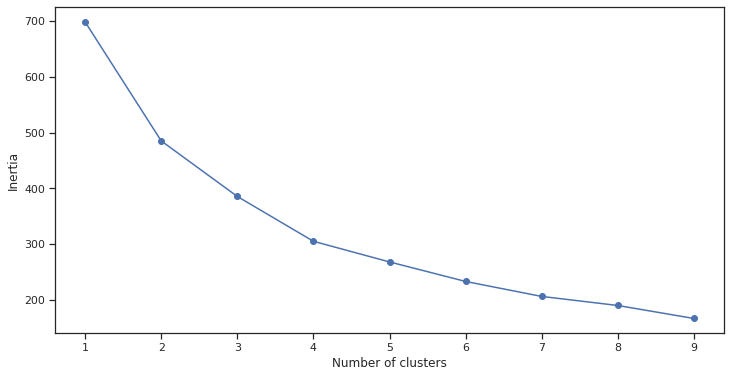

In [ ]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# First, build a model with 4 clusters

kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(X)

# Now, print the silhouette score of this model

print(siluet(X, kmeans.labels_, metric='euclidean'))

0.3216620630823476


In [ ]:
# First, build a model with 3 clusters

kmeans_k3 = KMeans(n_clusters = 3, init='k-means++')
kmeans_k3.fit(X)

# Now, print the silhouette score of this model

print(siluet(X, kmeans.labels_, metric='euclidean'))

0.3175593533919141


In [ ]:
# First, build a model with 5 clusters

kmeans_k5 = KMeans(n_clusters = 5, init='k-means++')
kmeans_k5.fit(X)

# Now, print the silhouette score of this model

print(siluet(X, kmeans.labels_, metric='euclidean'))

0.3175593533919141


In [ ]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Installing the required modules
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-07 07:28:18--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.1’

tau_unsup.py.1      100%[===================>]  16.98K  --.-KB/s    in 0s      

2022-10-07 07:28:18 (129 MB/s) - ‘tau_unsup.py.1’ saved [17387/17387]



In [ ]:
import tau_unsup as tau

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


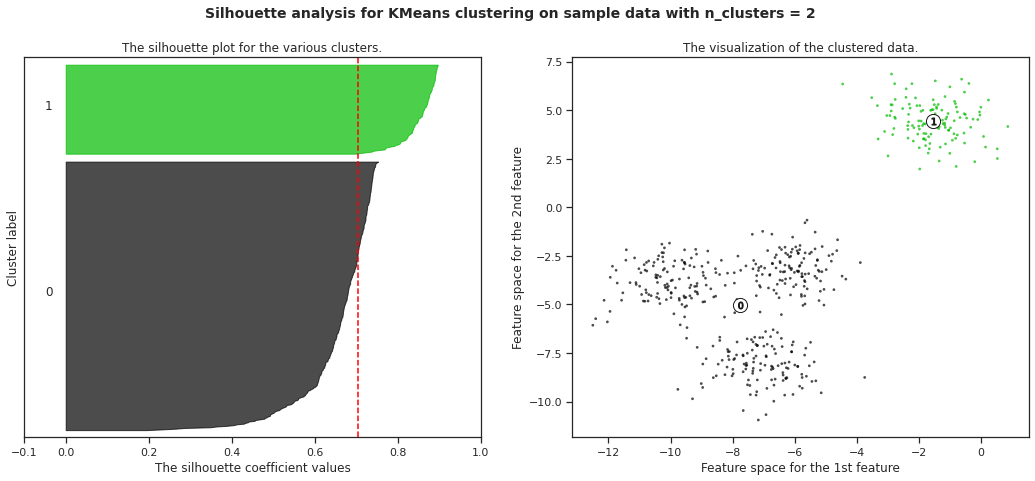

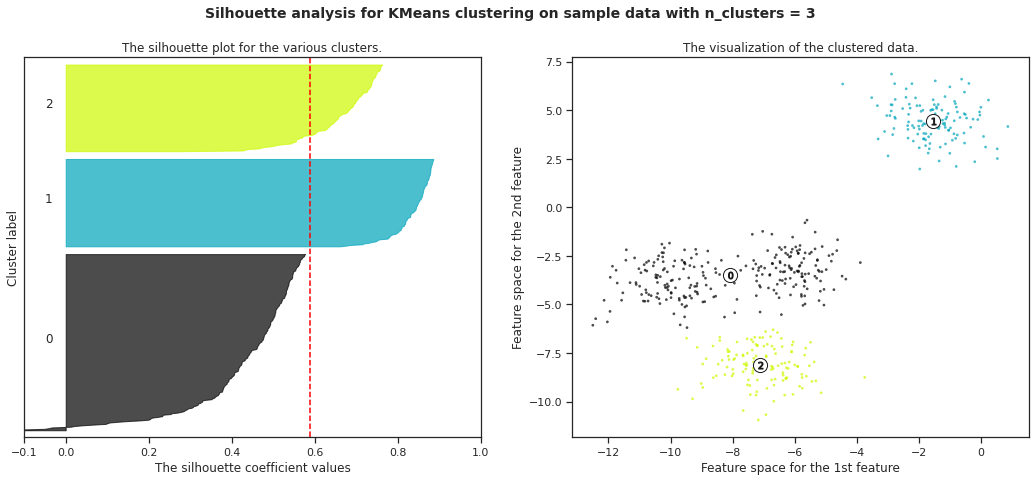

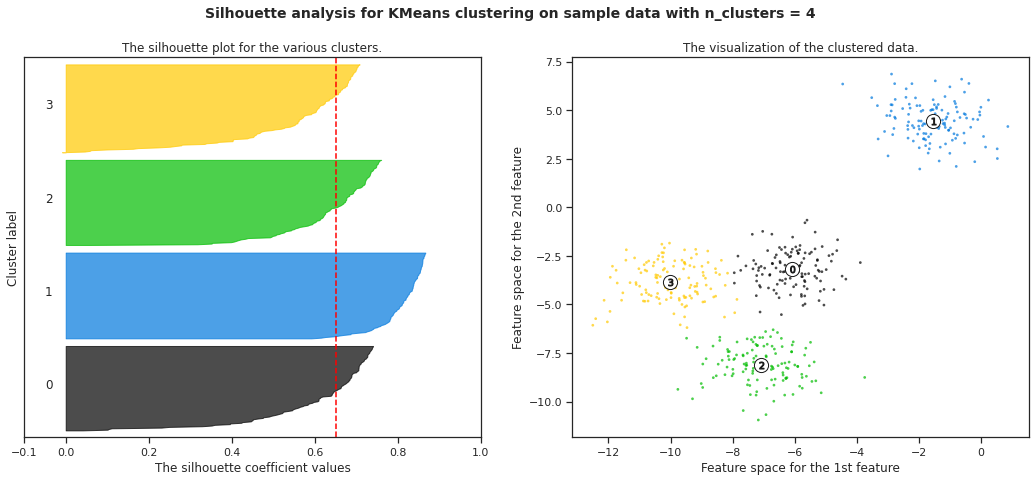

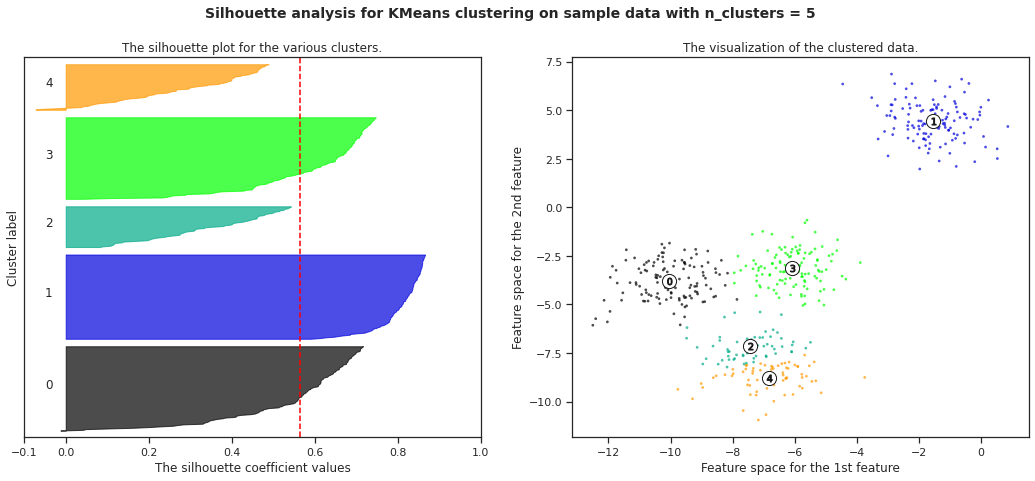

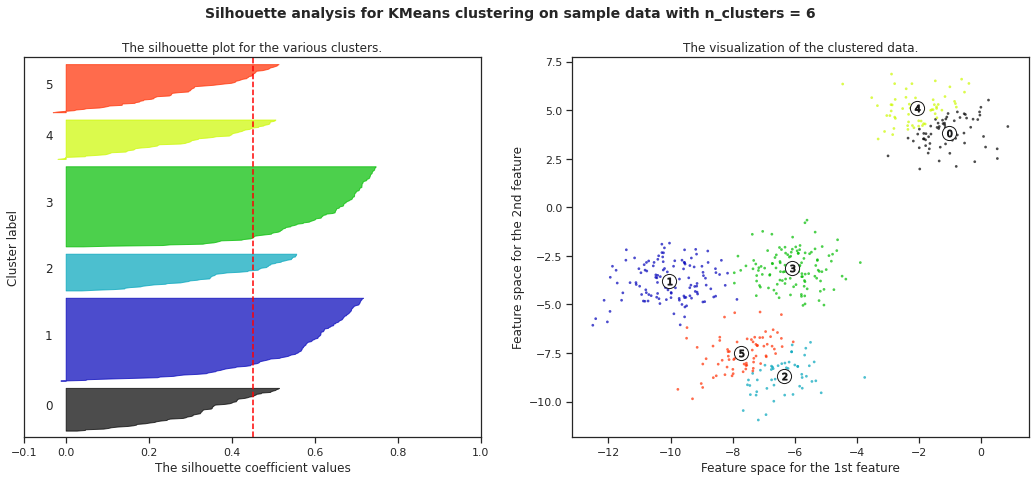

In [ ]:
tau.sil_based_optimal_km()

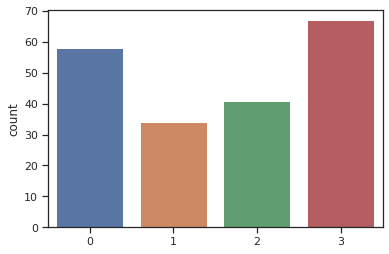

In [ ]:
C_km = kmeans.predict(X)
p= sns.countplot(x=C_km)

In [ ]:

predict=kmeans.fit(X)
df['cluster'] = pd.Series(y)

In [ ]:
y=kmeans.fit_predict(X)
print(y)

[3 2 3 0 3 2 0 0 0 0 0 2 1 3 3 3 1 2 3 3 0 0 3 1 2 0 3 3 0 2 0 2 2 3 0 1 0
 2 3 0 3 0 2 1 2 3 0 1 3 0 3 0 3 1 3 3 3 3 1 3 0 3 3 3 0 3 2 3 0 2 3 3 3 1
 0 1 3 2 2 0 2 3 2 0 3 3 3 0 3 2 1 1 3 1 1 2 3 3 2 0 3 1 1 3 3 3 0 0 0 0 0
 2 0 3 3 1 3 3 2 0 3 3 1 1 1 0 2 3 0 3 1 0 0 1 0 3 1 2 0 0 3 2 0 1 1 2 0 3
 0 3 1 2 1 0 2 0 3 2 2 3 2 0 2 3 2 3 2 2 0 2 0 1 3 0 2 1 1 0 0 2 1 2 1 0 1
 0 3 0 3 3 1 0 2 3 0 0 3 2 0 3]


In [ ]:
df.tail(10)

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,Pria,Wanita,0,1,Jumat,Kamis,Minggu,Rabu,Sabtu,Selasa,Senin,cluster
190,1.224253,1.047369,-1.440835,Tangerang,3,0,1,0,1,0,0,0,0,1,0,0,4
191,-1.283605,-1.662660,0.981706,Depok,1,0,1,0,1,0,0,0,0,0,0,1,3
192,-0.531248,0.360319,1.020159,Depok,1,0,1,0,1,0,0,0,0,0,0,1,0
193,1.391443,0.093133,-0.171885,Jakarta,2,1,0,0,1,0,0,0,0,1,0,0,2
194,-0.531248,-0.822933,0.404910,Jakarta,1,0,1,0,1,1,0,0,0,0,0,0,3
195,-0.531248,-1.357305,0.866347,Depok,1,1,0,0,1,0,0,0,0,0,0,1,3
196,1.642229,-0.250391,0.020380,Jakarta,1,1,0,0,1,0,0,1,0,0,0,0,2
197,-0.196867,2.268791,1.097065,Depok,1,0,1,0,1,0,0,0,0,0,0,1,0
198,-1.200010,-1.624491,1.673861,Depok,0,0,1,0,1,0,0,0,0,0,1,0,3
199,1.057062,-1.586321,-1.402382,Tangerang,3,1,0,0,1,0,0,1,0,0,0,0,2


In [ ]:
avg_df = df.groupby(['cluster'], as_index=False).mean()

In [ ]:
avg_df

,cluster,Umur,Pendapatan-per-bulan,skor-pengeluaran,Pria,Wanita,0,1,Jumat,Kamis,Minggu,Rabu,Sabtu,Selasa,Senin
0,0,-0.345707,0.950549,1.212424,0.439024,0.560976,0.000000,1.000000,0.024390,0.048780,0.195122,0.000000,0.292683,0.097561,0.341463
1,1,-1.176126,-0.103167,-0.291639,0.400000,0.600000,0.485714,0.514286,0.028571,0.000000,0.028571,0.057143,0.000000,0.171429,0.714286
2,2,0.929798,-0.533529,-0.384238,0.432836,0.567164,0.000000,1.000000,0.000000,0.044776,0.358209,0.044776,0.432836,0.044776,0.074627
3,3,-0.968516,-1.314731,0.937337,0.384615,0.615385,0.346154,0.653846,0.076923,0.038462,0.038462,0.000000,0.076923,0.230769,0.538462
4,4,0.587850,1.115089,-1.229964,0.483871,0.516129,0.000000,1.000000,0.032258,0.000000,0.290323,0.000000,0.354839,0.064516,0.258065


In [ ]:
df2=pd.read_csv('https://raw.githubusercontent.com/nataniaa/CobaAja/main/CaseStudy2fix.csv',sep=';')
df2

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1,Senin,7
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0


In [ ]:
df2['cluster'] = pd.Series(y)

In [ ]:
avg_df = df2.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Promo,FavFlavor
0,0,24.775862,1.095252e+07,59.482759,0.603448,1.258621,3.827586
1,1,41.264706,3.012295e+07,16.764706,0.911765,2.911765,4.000000
2,2,33.219512,2.887845e+07,82.000000,1.000000,0.804878,2.780488
3,3,48.791045,1.329826e+07,40.477612,1.000000,1.910448,3.716418


In [ ]:
df2

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,cluster
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6,0
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3,2
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7,1
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8,2
...,...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0,3
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5,2
197,Wanita,35,43032786,79,1,Depok,1,Senin,7,0
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0,3


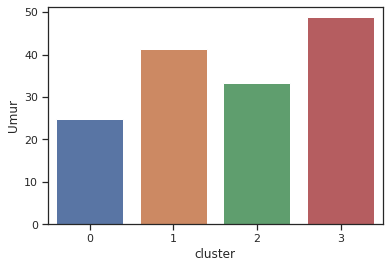

In [ ]:
sns.barplot(x='cluster',y='Umur',data=avg_df)


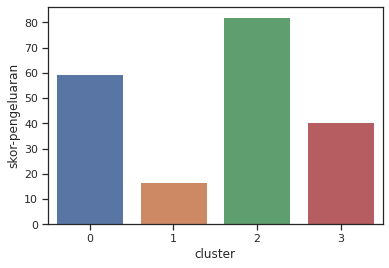

In [ ]:
sns.barplot(x='cluster',y='skor-pengeluaran',data=avg_df)

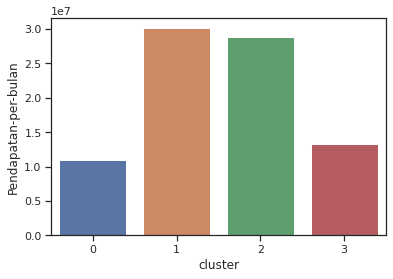

In [ ]:
sns.barplot(x='cluster',y='Pendapatan-per-bulan',data=avg_df)

CLUSTER


cluster 0 : Umur 20-30, skor pengeluaran cukup tinggi, pendapatan rendah

cluster 1 : Umur 40-an, skor pengeluaran rendah, pendapatan tinggi 

cluster 2 : Umur 30-40, skor pengeluaran tinggi, pendapatan tinggi


cluster 3 : umur 50-anm skor pengeluaran sedikit, pendapatan sedikit



Cluster 0 : careless buyer


Segmen ini berisi anak-anak muda, mungkin baru pertama kali bekerja, dan menghasilkan paling sedikit uang diantara cluster lain, namun mereka memiliki pengeluaran yang tinggi 

Rekomendasi : Karena mereka adalah anak-anak muda mungkin memberikan mereka kupon atau diskon merupakan ide yang baik, misalnya memberi diskon jika menunjukkan kartu mahasiswa


Cluster 1 : orang orang frugal 


Terdiri dari individu paruh baya yang sangat berhati-hati dengan uang.

Meskipun memiliki pendapatan rata-rata tertinggi dibandingkan dengan individu di semua kelompok lain, mereka menghabiskan paling sedikit.


Rekomendasi: mungkin dengan memberi promo, kupon, dan kode diskon kartu kredit atau debit akan menarik individu di segmen ini untuk berbelanja



Cluster 2 :


Segmen ini berisi orang-orang paruh baya, dengan pendapatan dan spending habit yang tinggi

Cluster 3 : 


Segmen ini terdiri dari kelompok orang yang lebih tua.

Mereka berpenghasilan  dan membelanjakan lebih sedikit, mungkin cluster ini berisi orang-orang yang hampir pensiun

Rekomendasi: Pemasaran kepada individu-individu ini dapat dilakukan melalui Facebook, yang menarik bagi demografis yang lebih tua. 

**Rekomendasi**

https://www.bps.go.id/indicator/5/2123/1/rata-rata-pengeluaran-perkapita-seminggu-menurut-kelompok-makanan-minuman-jadi-per-kabupaten-kota.html

Berdasarkan data yang kami dapatkan dari BPS mengenai pengeluaran per kapita, dapat diketahui data peminat es krim tertinggi pada kabupaten/kota di Indonesia dari pengeluaran per kapita setiap kabupaten/kota.
Sehingga, jika MixItUp ingin membuka cabang baru di kota lain, kami menyarankan untuk membuka cabang di Purwakarta, Sidoarjo, atau Kota Bandung untuk di Pulau Jawa. Jika ingin mengekspansi cabang di luar Pulau Jawa, maka dapat membuka cabang di Kota Mataram, Kota Batam, ataupun Kutai Timur.